<a href="https://colab.research.google.com/github/ASBRUC/DSPS_ABruce/blob/main/HW5/hacking_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Completed by Alex Bruce.**


In [ ]:
import numpy as np
import pylab as pl
#!pip install astropy
import matplotlib.pyplot as plt
import astropy
from astropy import units as u


%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [ ]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [ ]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


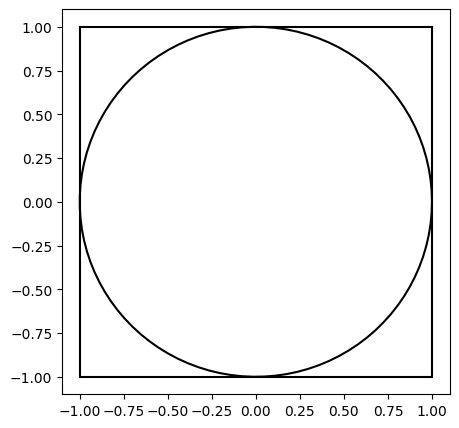

In [ ]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [ ]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  r = np.sqrt(x**2 + y**2)
  if r > l:
    return False
  else:
    return True

Text(0, -0.06, 'This plot shows 1000 random points with ranges [-1, 1] on the x and y axis. \nThere is a square and circle drawn on the image which will be used later on to estimate the value of Pi.\nThe visual distribution appears evenly distributed across the plot, which is expected.')

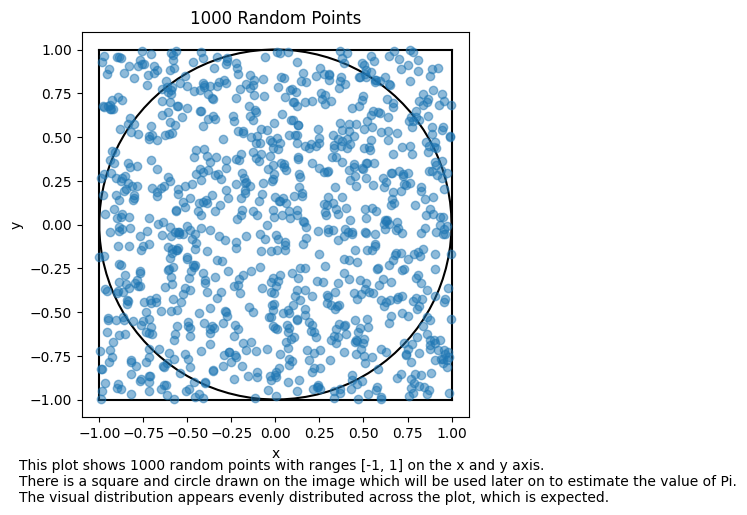

In [ ]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
np.random.seed(303)
x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-1, 1, 1000)
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)
plt.plot(x, y, 'o', alpha = 0.5);
plt.title('1000 Random Points')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(0,-0.06,'This plot shows 1000 random points with ranges [-1, 1] on the x and y axis. \nThere is a square and circle drawn on the image which will be used later on to estimate the value of Pi.\nThe visual distribution appears evenly distributed across the plot, which is expected.')

In [ ]:
...

Ellipsis

In [ ]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
#Testing with 1000 points:
inCount = 0
outCount = 0
for i in range(1000):
  if isin(x[i], y[i], 1) == True: #in circle
    inCount += 1
  else:
    outCount += 1
print(f"Number of Points inside circle is: {inCount}")
print(f"Number of Points ouside circle is: {outCount}")
print(f"The ratio of inCount to outCount is: {inCount/outCount}")
print(f"Our experimental value for Pi is: {4*inCount/1000}")

Number of Points inside circle is: 781
Number of Points ouside circle is: 219
The ratio of inCount to outCount is: 3.5662100456621006
Our experimental value for Pi is: 3.124


Number of Points inside circle is: 781 <br>
Number of Points ouside circle is: 219 <br>
The ratio of inCount to outCount is: 3.566 <br>
Our experimental value for Pi is: 3.124 <br>

### As we can see, the ratio of the inside / outside is 3.25. Using some simple geometry we can derive pi from these 2 numbers, the in circle and the total points.
$$ A_c = πr^2 $$
$$ A_s = 4r^2 $$
$$ \frac{A_c}{A_s} = \frac{\pi r^2}{4r^2} $$
$$ \pi = \frac{A_c}{A_s} × 4 $$
### So, we can get an approximation of pi from the ratio of the points in the circle vs total points. For 1000 points, I get 3.124 .

In [ ]:
#Trying with 10000000
inCount = 0
outCount = 0
x = np.random.uniform(-1, 1, 10000000)
y = np.random.uniform(-1, 1, 10000000)
for i in range(10000000):
  if isin(x[i], y[i], 1) == True: #in circle
    inCount += 1
  else:
    outCount += 1
print(f"Number of Points inside circle is: {inCount}")
print(f"Number of Points ouside circle is: {outCount}")
print(f"The ratio of inCount to outCount is: {inCount/outCount}")
print(f"Our experimental value for Pi is: {4*inCount/10000000}")

Number of Points inside circle is: 7853258
Number of Points ouside circle is: 2146742
The ratio of inCount to outCount is: 3.6582216214151493
Our experimental value for Pi is: 3.1413032
